# (3) 2.4: Evaluating Hyperparameters

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [7]:
path = r'C:\Users\nvak6\Machine Learning with Python'
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
climate = pd.read_csv(os.path.join(path, 'weather_cleaned_date.csv'), index_col=False)

### Wrangling Data
- Only want data from 2010-2019

In [13]:
climate_decade = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate_decade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,6.4,1.6,-0.5,5.0,8,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.9965,0.20,0.43,0.0,3.1,0.1,4.9,7,0.76,1.0110,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,0.76,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,0.88,1.0152,0.26,0.45,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,5.9,1.3,-2.4,3.0,7,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,0.81,1.0205,0.42,0.00,0.3,5.0,2.6,7.5,6,0.86,1.0193,0.31,0.07,0.6,-2.5,-5.3,0.1,3,0.74,1.0233,0.12,0.00,2.3,-11.0,-13.8,-7.9,8,0.84,1.0250,0.32,1.23,0.0,-17.0,-23.1,-10.9,7,0.74,1.0189,0.10,0.07,0.7,-8.9,-11.1,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,0.82,1.01

In [15]:
pleasant_decade = pleasant[(pleasant['DATE'].astype(str).str[:4] >= '2010') & (pleasant['DATE'].astype(str).str[:4] <= '2019')]
pleasant_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Drop columns that end with wind_speed and snow_depth from the dataset
columns_to_drop = climate_decade.filter(regex='(_wind_speed|_snow_depth)$').columns
columns_to_drop

Index([], dtype='object')

In [19]:
climate_decade = climate_decade.drop(columns=columns_to_drop)

In [21]:
# Drop unnecessary columns
climate_decade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [23]:
pleasant_decade.drop(columns = 'DATE', inplace = True)

### Reshaping

In [26]:
X = climate_decade
y = pleasant_decade

In [28]:
# Turn X and y from a df to arrays
X = np.array(X)
y = np.array(y)

### Data Spliting

In [31]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


In [35]:
# Create a RF classifier
clf = RandomForestClassifier()

In [37]:
grid_space = {
    'max_depth': [3, 10, None],  # Focus on a smaller range
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_features': [15, 50],  # Focus on fewer values
    'min_samples_leaf': [1, 2],  # Smaller range
    'min_samples_split': [2, 3]  # Avoid using 1 (invalid in sklearn)
}

In [39]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 2.620873244603475 minutes


In [40]:
# Print grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6385542168674699


### Random Search

In [44]:
# Define random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [46]:
# Create a RF classifier
clf2= RandomForestClassifier()

In [48]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 4.9128027399381 minutes


In [49]:
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 86, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 160}
Best RANDOM search score is: 0.6345381526104418


In [50]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6385542168674699
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 30, 'max_features': 86, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 160}
Best RANDOM search score is: 0.6345381526104418


### Random Forest Search with Optimized Parameters

In [55]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=50, max_features=73, min_samples_leaf=1, min_samples_split=8)  

In [57]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=73, min_samples_split=8,
                       n_estimators=200)

In [58]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6506024096385542


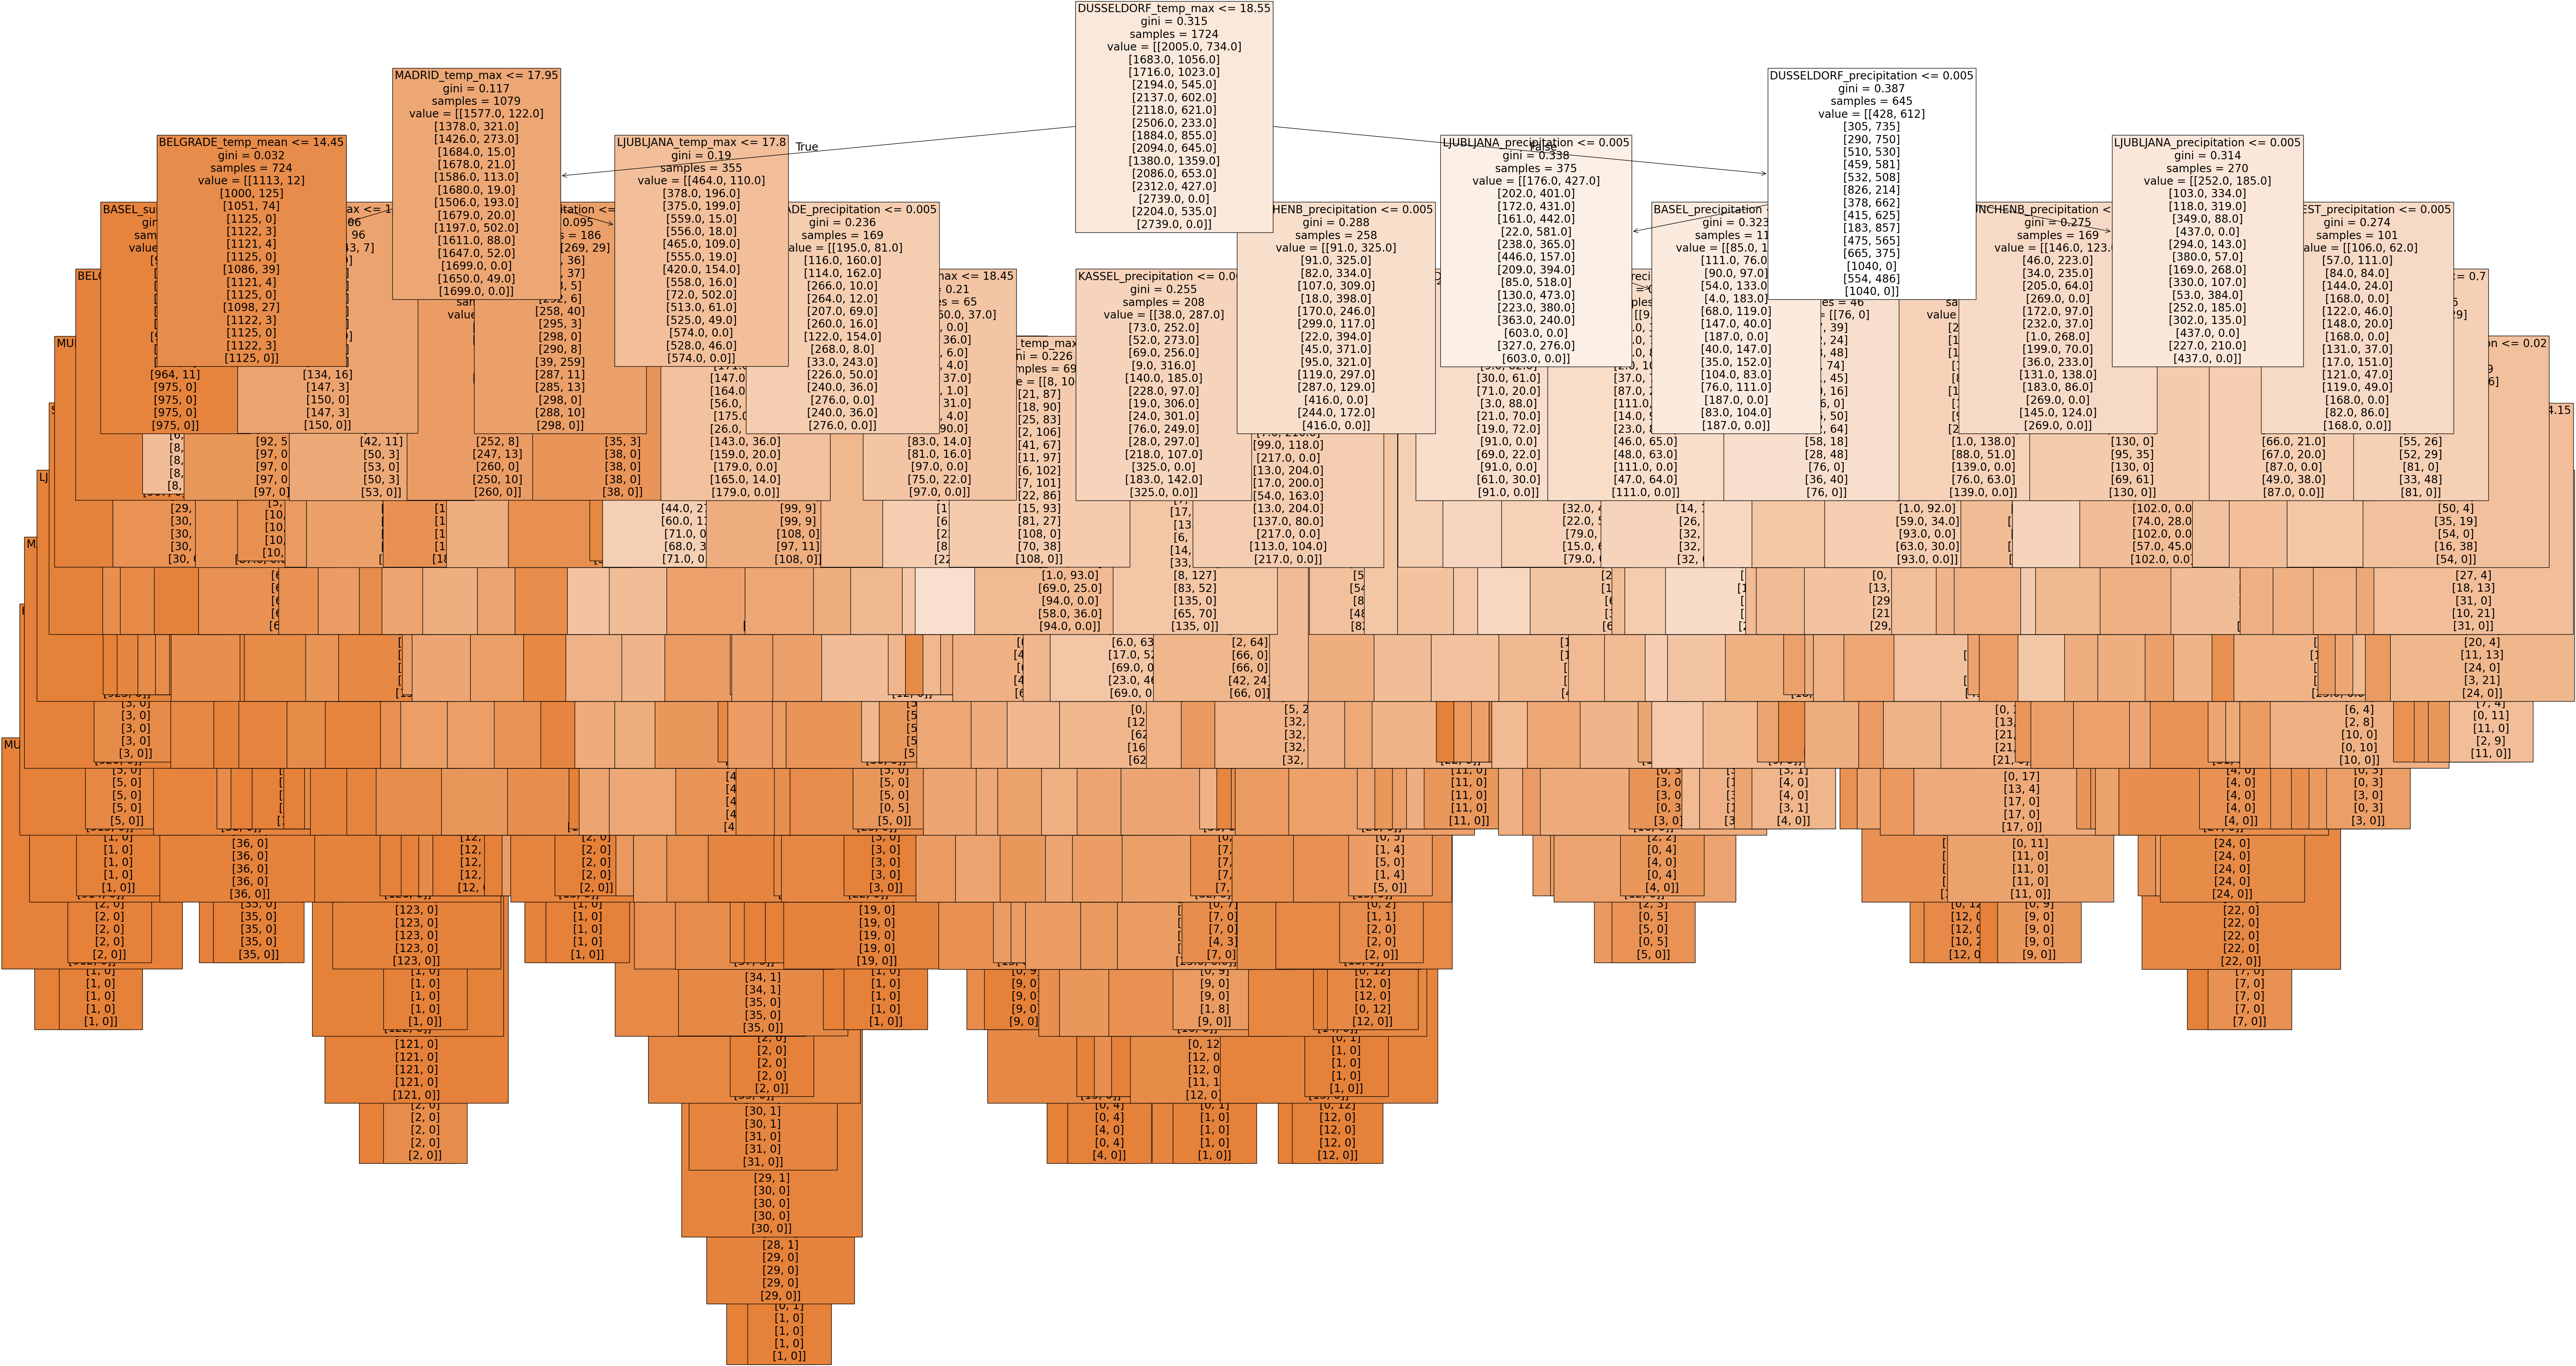

In [59]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = climate_decade.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [60]:
fig.savefig(os.path.join(path, 'optimized_random_forest_2010s.png'),bbox_inches='tight')

### Important Features

In [65]:
# Retrieve feature importances from the trained model
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([6.93301553e-04, 1.38155087e-03, 8.30565454e-04, 9.52681956e-04,
       3.37700685e-02, 2.79072924e-03, 6.31305919e-03, 8.51316306e-04,
       8.46008957e-02, 1.88520583e-03, 1.47220423e-03, 1.35818957e-03,
       1.00259482e-03, 3.08315896e-02, 1.29670647e-03, 2.17588142e-03,
       8.78789458e-04, 8.61400093e-03, 1.43356564e-04, 0.00000000e+00,
       0.00000000e+00, 4.65633531e-04, 3.19885763e-02, 4.79179909e-04,
       6.52539992e-03, 1.02609354e-03, 2.23862914e-02, 5.61534059e-04,
       8.26387988e-04, 1.14897810e-03, 1.47035195e-03, 1.75835893e-02,
       1.44919791e-03, 1.18296729e-03, 9.21628414e-04, 3.36881034e-02,
       4.40833141e-04, 7.28167718e-04, 8.86914027e-04, 9.16731551e-04,
       4.00951866e-02, 1.15483964e-03, 1.07257317e-03, 8.38791679e-04,
       1.78049076e-01, 1.03141630e-03, 1.94706633e-03, 1.11527393e-03,
       2.21623632e-03, 1.59303616e-02, 2.62242035e-03, 1.84604658e-03,
       1.12865748e-03, 9.03185918e-03, 3.46270409e-04, 1.02880073e-03,
      

In [70]:
# Reshape newarray
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[6.93301553e-04, 1.38155087e-03, 8.30565454e-04, 9.52681956e-04,
         3.37700685e-02, 2.79072924e-03, 6.31305919e-03, 8.51316306e-04,
         8.46008957e-02],
        [1.88520583e-03, 1.47220423e-03, 1.35818957e-03, 1.00259482e-03,
         3.08315896e-02, 1.29670647e-03, 2.17588142e-03, 8.78789458e-04,
         8.61400093e-03],
        [1.43356564e-04, 0.00000000e+00, 0.00000000e+00, 4.65633531e-04,
         3.19885763e-02, 4.79179909e-04, 6.52539992e-03, 1.02609354e-03,
         2.23862914e-02],
        [5.61534059e-04, 8.26387988e-04, 1.14897810e-03, 1.47035195e-03,
         1.75835893e-02, 1.44919791e-03, 1.18296729e-03, 9.21628414e-04,
         3.36881034e-02],
        [4.40833141e-04, 7.28167718e-04, 8.86914027e-04, 9.16731551e-04,
         4.00951866e-02, 1.15483964e-03, 1.07257317e-03, 8.38791679e-04,
         1.78049076e-01],
        [1.03141630e-03, 1.94706633e-03, 1.11527393e-03, 2.21623632e-03,
         1.59303616e-02, 2.62242035e-03, 1.84604658e-03, 1.12865748

In [72]:
# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.13218417, 0.04951516, 0.06301453, 0.05883274, 0.22418311,
       0.03686934, 0.02325633, 0.07134653, 0.12310083, 0.07922766,
       0.06034223, 0.0386285 , 0.0080377 , 0.03001169, 0.00144946])

In [88]:
# Extract stations list
stations = [col.split('_')[0] for col in climate_decade.columns if '_' in col]

In [90]:
# Create a set of unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [94]:
# Convert the set to a list
unique_stations_list = list(unique_stations)
# Slice the list to match the length of sumarray
unique_stations_list = unique_stations_list[:len(sumarray)]

In [98]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

STOCKHOLM     0.224183
BELGRADE      0.132184
VALENTIA      0.123101
HEATHROW      0.079228
SONNBLICK     0.071347
LJUBLJANA     0.063015
MUNCHENB      0.060342
MAASTRICHT    0.058833
OSLO          0.049515
KASSEL        0.038629
BASEL         0.036869
BUDAPEST      0.030012
DUSSELDORF    0.023256
MADRID        0.008038
DEBILT        0.001449
dtype: float64

In [100]:
# Create a df to associate weather stations with their importances
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BELGRADE', 'OSLO', 'LJUBLJANA', 'MAASTRICHT', 'STOCKHOLM', 'BASEL', 'DUSSELDORF', 'SONNBLICK', 'VALENTIA', 'HEATHROW', 'MUNCHENB', 'KASSEL', 'MADRID', 'BUDAPEST', 'DEBILT']


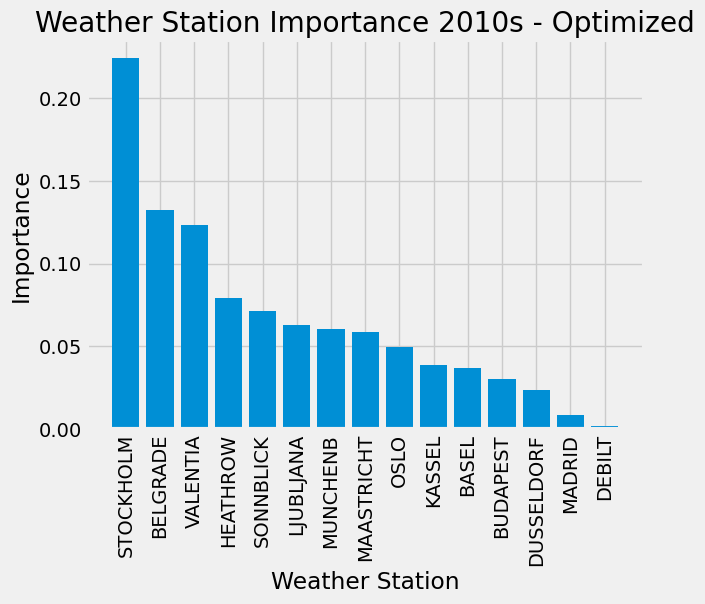

In [102]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path,'optimized_2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()